In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl
from scipy.stats import linregress

In [2]:
df = pd.read_csv('life_expectancy_data.csv')

In [3]:
df.info

<bound method DataFrame.info of      Country  Year  Life expectancy at birth (years)           GDP
0      Chile  2000                              77.3  7.786093e+10
1      Chile  2001                              77.3  7.097992e+10
2      Chile  2002                              77.8  6.973681e+10
3      Chile  2003                              77.9  7.564346e+10
4      Chile  2004                              78.0  9.921039e+10
..       ...   ...                               ...           ...
91  Zimbabwe  2011                              54.9  1.209845e+10
92  Zimbabwe  2012                              56.6  1.424249e+10
93  Zimbabwe  2013                              58.0  1.545177e+10
94  Zimbabwe  2014                              59.2  1.589105e+10
95  Zimbabwe  2015                              60.7  1.630467e+10

[96 rows x 4 columns]>

In [4]:
df.columns

Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')

In [6]:
df.dtypes

Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object

In [7]:
# Check for NaN values 
df.isnull().values.any()
# Returns False, thus no NaN values

False

In [8]:
# Creates global variables with same name as the df column name. This is so we can call X instead of df.X 
for column in df.columns:
    globals()[column] = df[column]

In [9]:
# Get all unique values for each column
unique_values = {}
for column in df.columns:
    unique_values[column] = df[column].unique()
    
# Print the unique values for each column
for column, values in unique_values.items():
    print(f"Unique values in column {column}: {values}")



Unique values in column Country: ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
Unique values in column Year: [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]
Unique values in column Life expectancy at birth (years): [77.3 77.8 77.9 78.  78.4 78.9 79.6 79.3 79.1 79.8 79.9 80.1 80.3 80.5
 71.7 72.2 72.7 73.1 73.5 73.9 74.2 74.4 74.5 74.9 75.  75.2 75.4 75.6
 75.8 76.1 78.3 78.5 79.2 80.  80.6 80.9 81.  74.8 75.3 76.  75.7 76.3
 76.6 76.7 76.8 76.9 77.  77.2 77.5 78.1 78.2 78.7 78.8 46.  45.3 44.8
 44.5 44.3 44.6 45.4 46.6 48.2 50.  52.4 54.9 56.6 58.  59.2 60.7]
Unique values in column GDP: [7.78609322e+10 7.09799240e+10 6.97368114e+10 7.56434598e+10
 9.92103929e+10 1.22965000e+11 1.54788000e+11 1.73606000e+11
 1.79638000e+11 1.72389000e+11 2.18538000e+11 2.52252000e+11
 2.67122000e+11 2.78384000e+11 2.60990000e+11 2.42518000e+11
 1.21135000e+12 1.33940000e+12 1.47055000e+12 1.66029000e+12
 1.95535000e+12 2.28597000e+12 2.752

## To get a slightly better idea of some data trends, the following questions are proposed: 
Has life expectancy increased over time in the six nations?\
Has GDP increased over time in the six nations?\
Is there a correlation between GDP and life expectancy of a country?\
What is the average life expectancy in these nations?\
What is the distribution of that life expectancy?

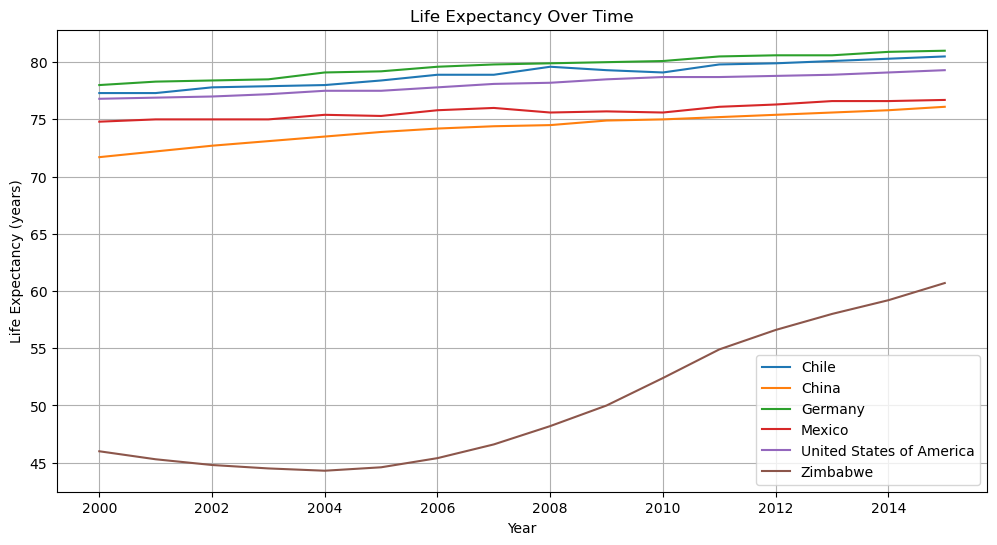

In [10]:
# Find if  life expectancy per country has increased

grouped_country = df.groupby(Country)

plt.figure(figsize=(12,6))

for country, data in grouped_country:
    plt.plot(data['Year'], data['Life expectancy at birth (years)'], label=country )

plt.title('Life Expectancy Over Time')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')
plt.legend()
plt.grid(True)

plt.show()

In [11]:
# Another approach to answer this question is as follows: 

# Create two new dataframes that select all rows from the original dataframe for the years 2000 and 2015
LE_2000 = df[df['Year']==2000]
LE_2015 = df[df['Year']==2015]

# Group by Country so we can get the avg per "Country", instead of the combined average
grouped_2000 = LE_2000.groupby('Country')
grouped_2015 = LE_2015.groupby('Country')

# Calculate avg LE (Life expectancy) per year
avg_LE_2000 = grouped_2000['Life expectancy at birth (years)'].mean()
avg_LE_2015 = grouped_2015['Life expectancy at birth (years)'].mean()

LE_difference = avg_LE_2015 - avg_LE_2000 
print("Increase in Life Expectancy from 2000 to 2015:")
print(LE_difference)

# Interpretation: All numbers are positive meaning that each country did have their life expectancy incresased over time.
# Note: taking the average (avg) here is not completely necessary, since the dataset only contains one value per year per country. Thus in this case it doesn't make a difference.

Increase in Life Expectancy from 2000 to 2015:
Country
Chile                        3.2
China                        4.4
Germany                      3.0
Mexico                       1.9
United States of America     2.5
Zimbabwe                    14.7
Name: Life expectancy at birth (years), dtype: float64


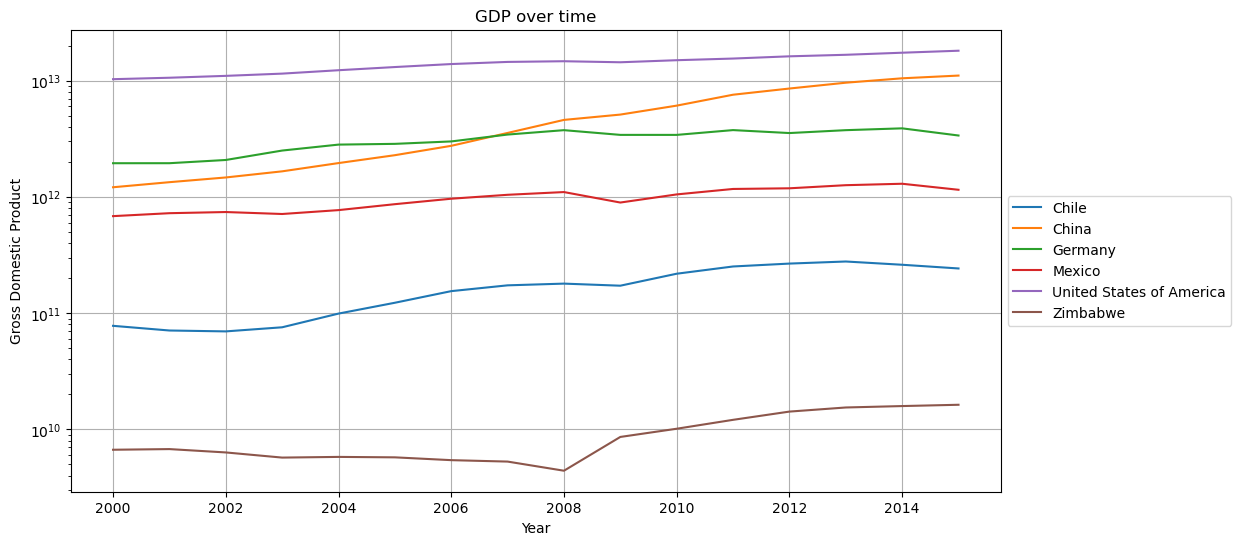

In [12]:
# Has GDP increased over time in the six nations? 
grouped_gdp = df.groupby(GDP)

plt.figure(figsize=(12,6))

for country, data in grouped_country:
    plt.plot(data['Year'], data['GDP'], label=country )

plt.title('GDP over time')
plt.xlabel('Year')
plt.ylabel('Gross Domestic Product')
plt.yscale('log') 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) # move legend outside of graph
plt.grid(True)

plt.show()

### We us Log scaling because there it is difficult to distinguish an increase without it. This means that currently it looks like i.e. GDP of China and USA are similar, but they are not, there is a big difference between them. Log scaling is difficult to interpret for people who don't know what it means. Therefore below another graph can be found, that displays the same, but provides a slightly different visualization. 
#### This visualization clearly shows how big the difference is between GDP's, but it is difficult to distinguish if the GDP of i.e. Zimbabwe has improved at all. This was the in scope of the research question, thus yscale(log) was used.


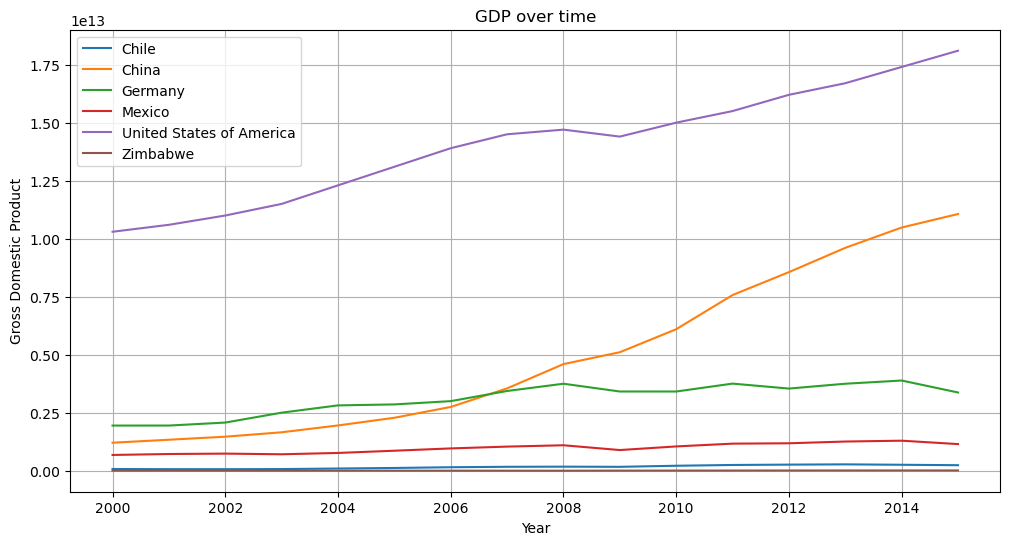

In [13]:
# Has GDP increased over time in the six nations? 
grouped_gdp = df.groupby(GDP)

plt.figure(figsize=(12,6))

for country, data in grouped_country:
    plt.plot(data['Year'], data['GDP'], label=country )

plt.title('GDP over time')
plt.xlabel('Year')
plt.ylabel('Gross Domestic Product')
plt.legend()
plt.grid(True)

plt.show()

In [14]:
avg_GDP_2000 = grouped_2000['GDP'].mean()
avg_GDP_2015 = grouped_2015['GDP'].mean()

GDP_difference = avg_GDP_2015 - avg_GDP_2000 

# Convert the GDP difference values to a more readable format
formatted_GDP_difference = GDP_difference.apply(lambda x: '{:,.2f}'.format(x))

print("Increase in GDP from 2000 to 2015:")
print(formatted_GDP_difference)

# 

Increase in GDP from 2000 to 2015:
Country
Chile                         164,657,067,848.00
China                       9,853,350,000,000.00
Germany                     1,425,660,000,000.00
Mexico                        468,612,000,000.00
United States of America    7,800,000,000,000.00
Zimbabwe                        9,614,710,207.00
Name: GDP, dtype: object


# Is there a correlation between GDP and life expectancy of a country?

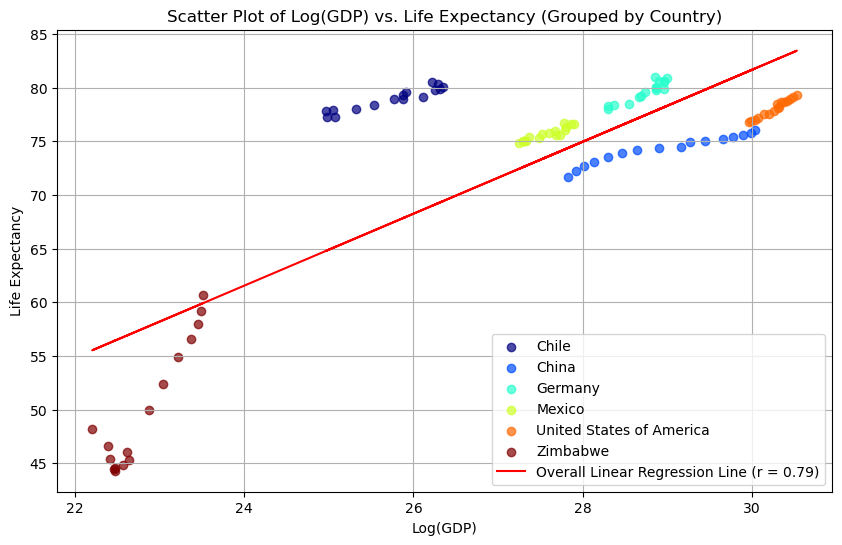

In [26]:
plt.figure(figsize=(10, 6))
# Create a color map for each group (country)
colors = plt.cm.jet(np.linspace(0, 1, len(grouped_country)))

# Iterate through each group (country) and plot a scatter plot with a unique color
for i, (country, data) in enumerate(grouped_country):
    plt.scatter(np.log(data['GDP']), data['Life expectancy at birth (years)'],
                label=country, alpha=0.7, color=colors[i])

plt.title('Scatter Plot of Log(GDP) vs. Life Expectancy (Grouped by Country)')
plt.xlabel('Log(GDP)')
plt.ylabel('Life Expectancy')
plt.grid(True)

# Calculate regression line for all data points
slope, intercept, r_value, p_value, std_err = linregress(np.log(df['GDP']), df['Life expectancy at birth (years)'])
line = slope * np.log(df['GDP']) + intercept
plt.plot(np.log(df['GDP']), line, color='red', label=f'Overall Linear Regression Line (r = {r_value:.2f})')

plt.legend()
plt.show()

# What is the average life expectancy in these nations?

In [39]:
# Get a list of all unique countries in the 'Country' column
unique_countries = df['Country'].unique()

# Iterate through each unique country and calculate the average life expectancy
for country in unique_countries:
    filtered_data = df[df['Country'] == country]
    average_life_expectancy = filtered_data['Life expectancy at birth (years)'].mean()
    print(f"The average life expectancy in {country} is {average_life_expectancy:.2f} years.")




The average life expectancy in Chile is 78.94 years.
The average life expectancy in China is 74.26 years.
The average life expectancy in Germany is 79.66 years.
The average life expectancy in Mexico is 75.72 years.
The average life expectancy in United States of America is 78.06 years.
The average life expectancy in Zimbabwe is 50.09 years.


 # What is the distribution of that life expectancy?

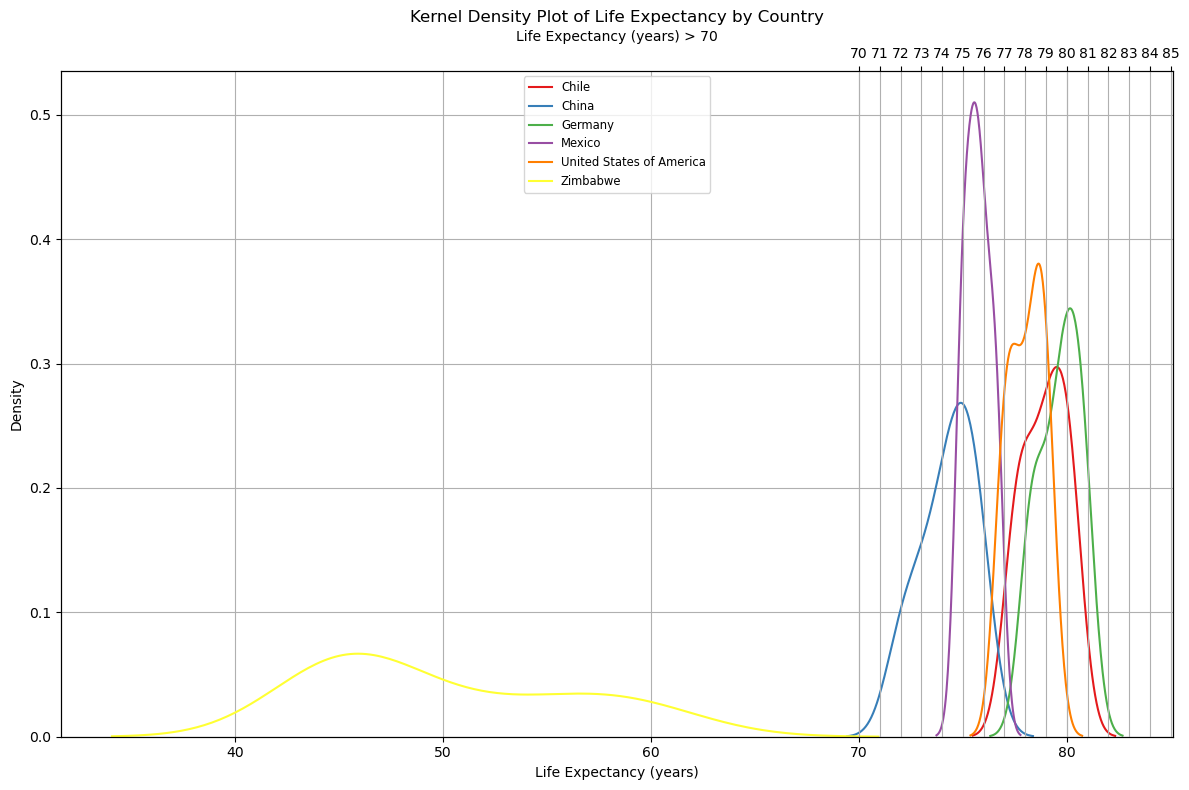

In [52]:
# Approach: Create two plots, one for zimbabwe, one for the other countries. Combine the plots to show in the same figure. (One Y and one X axis.)

fig, ax1 = plt.subplots(figsize=(12, 8))

# Get colors for each country
colors = sns.color_palette('Set1', len(unique_countries))

# For better visualization we'll split the graph, Zimbabwe skews the graph making the right side unreadable.
threshold = 70

for i, country in enumerate(unique_countries):
    country_data = df[df['Country'] == country]
    life_expectancy = country_data['Life expectancy at birth (years)']
    sns.kdeplot(life_expectancy, label=country, color=colors[i], ax=ax1)

    
ax1.set_title('Kernel Density Plot of Life Expectancy by Country')
ax1.set_xlabel('Life Expectancy (years)')
ax1.set_ylabel('Density')

# Add legends to the primary axes
ax1.legend(loc='upper center', fontsize='small')

# Create a secondary x-axis (twinx) with a transformed scale
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())  # Match the x-axis limits of the primary axes

# Set the secondary x-axis labels and ticks
new_ticks = [threshold] + list(range(threshold + 1, int(ax1.get_xlim()[1]) + 1, 1))
ax2.set_xticks(new_ticks)
ax2.set_xticklabels([str(x) for x in new_ticks])
ax2.set_xlabel('Life Expectancy (years) > 70')

# Grid for both axes
ax1.grid(True)
ax2.grid(True)

# Adjust spacing
plt.tight_layout()
plt.show()
